In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

# **Reticolo B1**

In [2]:
Q_12_280 = np.loadtxt('Q_12_280.out')
Qsquare_12_280=np.mean(Q_12_280**2) #calcolo <Q2>
Qsquare_12_280_err=np.std(Q_12_280**2)/sqrt(len(Q_12_280))
print('<Q2> =', Qsquare_12_280, '±', Qsquare_12_280_err)


<Q2> = 1.6109668510028254 ± 0.07202329755750297


In [3]:
Qsquare_12=Qsquare_12_280
Qsquare_12_err=Qsquare_12_280_err

In [4]:
t0a2_12=2.7984
t0a2_12_err=0.0009
chi_12=t0a2_12**2*Qsquare_12/12**4
chi_12_err=sqrt(t0a2_12**4*Qsquare_12_err**2+4*t0a2_12**2*Qsquare_12**2*t0a2_12_err**2)/12**4 #formulazza schifosa prop errori

# **Reticolo B2**

In [5]:
Q_16b_350 = np.loadtxt('1_16b_350.out')
Qsquare_16b_350=np.mean(Q_16b_350**2) #calcolo <Q2>  
Qsquare_16b_350_err=np.std(Q_16b_350**2)/sqrt(len(Q_16b_350)) #calcolo errore
print('<Q2> =', Qsquare_16b_350, '±', Qsquare_16b_350_err)


<Q2> = 2.825173167961285 ± 0.11940091647105588


In [6]:
Q_16b_400 = np.loadtxt('1_16b_400.out')
Qsquare_16b_400=np.mean(Q_16b_400**2) #calcolo <Q2>
Qsquare_16b_400_err=np.std(Q_16b_350**2)/sqrt(len(Q_16b_400)) #calcolo errore

print('<Q2> =', Qsquare_16b_400, '±', Qsquare_16b_400_err)

<Q2> = 2.850626054626544 ± 0.11940091647105588


In [7]:
Qsquare_16b=np.mean([Qsquare_16b_350, Qsquare_16b_400])
Qsquare_16b_err=sqrt(Qsquare_16b_350_err**2+Qsquare_16b_400_err**2)/2
print('<Q2> =', Qsquare_16b, '±', Qsquare_16b_err)
Qsquare_16b_err*(14/16)**4

<Q2> = 2.8378996112939143 ± 0.08442919771657215


0.049490845634152764

In [8]:
t0a2_16b=3.7960
t0a2_16b_err=0.0012
chi_16b=t0a2_16b**2*Qsquare_16b/16**4
chi_16b_err=sqrt(t0a2_16b**4*Qsquare_16b_err**2+4*t0a2_16b**2*Qsquare_16b**2*t0a2_16b_err**2)/16**4 #formulazza schifosa prop errori



# **Reticolo B3**

In [9]:
Q_16_480 = np.loadtxt('1_16_480.out')
Qsquare_16_480=np.mean(Q_16_480**2) #calcolo <Q2>
Qsquare_16_480_err=np.std(Q_16_480**2)/sqrt(len(Q_16_480)) #calcolo errore
print('<Q2> =', Qsquare_16_480, '±', Qsquare_16_480_err)

<Q2> = 1.661592629564441 ± 0.07741372489834612


In [10]:
Qsquare_16=Qsquare_16_480
Qsquare_16_err=Qsquare_16_480_err

In [11]:
t0a2_16=4.8855
t0a2_16_err=0.0015
chi_16=t0a2_16**2*Qsquare_16/16**4
chi_16_err=sqrt(t0a2_16**4*Qsquare_16_err**2+4*t0a2_16**2*Qsquare_16**2*t0a2_16_err**2)/16**4 #formulazza schifosa prop errori


# **Estrapolazione al continuo**

In [12]:
from scipy.optimize import curve_fit
def lin(x, m, q):
    return x*m+q

In [13]:
x=np.array([1/t0a2_12, 1/t0a2_16b, 1/t0a2_16])
y=np.array([chi_12, chi_16b, chi_16])
sigma_y=np.array([chi_12_err, chi_16b_err, chi_16_err])
par, cov= curve_fit(lin, x, y, sigma=sigma_y, absolute_sigma=True)
print(par)
print(cov)



[-9.93888452e-06  6.18570103e-04]
[[ 6.34950225e-08 -1.73377994e-08]
 [-1.73377994e-08  4.91571689e-09]]


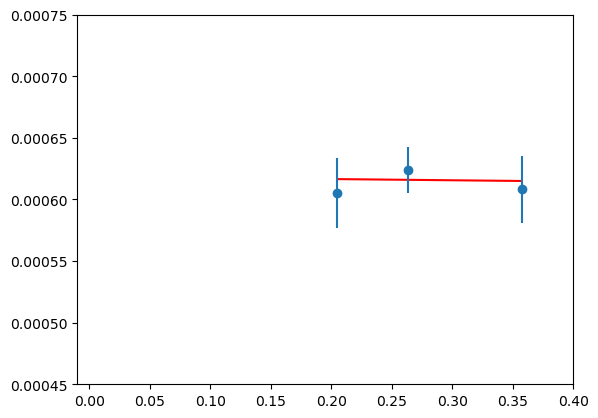

[0.35734706 0.26343519 0.20468734]


In [14]:

plt.plot(x, par[0] * x + par[1], 'r')
plt.errorbar(x, y, yerr=sigma_y, fmt='o')
plt.xlim(0-0.01, 0.4)
plt.ylim(0.00045,0.00075)
plt.show()
print(x)


In [15]:
t02chi_continuo=par[1]
t02chi_continuo_err=sqrt(cov[1][1])
print('t0^2 chi_continuo =', t02chi_continuo, '±', t02chi_continuo_err)

t0^2 chi_continuo = 0.0006185701031123223 ± 7.01121736229365e-05


In [16]:
sqrtt0=0.176
sqrtt0_err=0.004
t0squareinv=sqrtt0**(-4)
t0squareinv_err=4*sqrtt0**(-5)*sqrtt0_err
chi_continuo=t02chi_continuo*t0squareinv #è in fermi alla -4
chi_continuo_errstat=t02chi_continuo_err*t0squareinv
chi_continuo_errsist=t02chi_continuo*t0squareinv_err
hbarc=197.3269804
chi_continuo_pu=chi_continuo*hbarc**4
chi_continuo_pu_errstat=chi_continuo_errstat*hbarc**4
chi_continuo_pu_errsist=chi_continuo_errsist*hbarc**4
print('chi=', chi_continuo_pu**(1/4), '±', 0.25*chi_continuo_pu**(-3/4)*chi_continuo_pu_errstat, '±', 0.25*chi_continuo_pu**(-3/4)*chi_continuo_pu_errsist)


chi= 176.81578511146049 ± 5.010320965495913 ± 4.018540570715011
